# Transfer Learning

In [ ]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

import datetime

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
imageDirectory = "/content/gdrive/MyDrive/shape_dataset"

In [ ]:
batchSize = 32
imageSize = (224, 224)
classNames = ['circle', 'line', 'square', 'triangle']

In [ ]:
trainDataset = tf.keras.preprocessing.image_dataset_from_directory(
    imageDirectory,
    batch_size=batchSize,
    image_size=imageSize,
    class_names=classNames,
    shuffle=True,
    seed=42,
    validation_split=0.2,  # Set the split for training and validation
    subset='training'      # Choose 'training' or 'validation'
)

Found 6318 files belonging to 4 classes.
Using 5055 files for training.


In [ ]:
validationDataset = tf.keras.preprocessing.image_dataset_from_directory(
    imageDirectory,
    batch_size=batchSize,
    image_size=imageSize,
    class_names=classNames,
    shuffle=True,
    seed=42,
    validation_split=0.2,  # Set the split for training and validation
    subset='validation'      # Choose 'training' or 'validation'
)

Found 6318 files belonging to 4 classes.
Using 1263 files for validation.


In [ ]:
class_names = np.array(trainDataset.class_names)
print(class_names)

['circle' 'line' 'square' 'triangle']


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = trainDataset.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
val_ds = validationDataset.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor_model = mobilenet_v2

In [ ]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)

In [ ]:
# @title Default title text
num_classes = len(class_names)

model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(4,activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])
 # Enable histogram computation for every epoch.

In [ ]:
NUM_EPOCHS = 4

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=NUM_EPOCHS,)

Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


158/158 [==============================] - 836s 5s/step - loss: 0.1950 - acc: 0.9395 - val_loss: 0.0524 - val_acc: 0.9897
Epoch 2/4
158/158 [==============================] - 291s 2s/step - loss: 0.0470 - acc: 0.9903 - val_loss: 0.0344 - val_acc: 0.9960
Epoch 3/4
158/158 [==============================] - 291s 2s/step - loss: 0.0323 - acc: 0.9913 - val_loss: 0.0288 - val_acc: 0.9960
Epoch 4/4
158/158 [==============================] - 289s 2s/step - loss: 0.0243 - acc: 0.9933 - val_loss: 0.0265 - val_acc: 0.9960


In [ ]:
# from sklearn.metrics import classification_report

# # Assuming you have already trained your model and got predictions
# predictions = model.predict(test_ds)

# # Convert predictions to binary labels (0 or 1, depending on your problem)
# binary_predictions = (predictions > 0.5).astype(int)

# # Assuming your ground truth labels are stored in test_labels
# # You can extract them from the test dataset or any other source
# # For binary classification, test_labels should be 0 or 1

# # Calculate classification metrics
# report = classification_report(test_labels, binary_predictions, target_names=class_names)

# print(report)


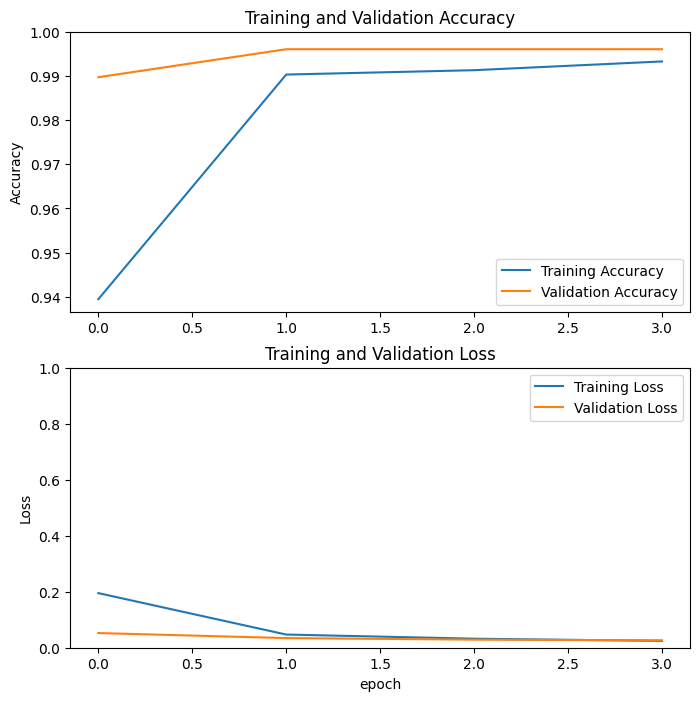

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Extract metrics from history
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Print values for training and validation accuracy and loss
print("Training Accuracy: {:.4f}".format(acc[-1]))
print("Validation Accuracy: {:.4f}".format(val_acc[-1]))
print("Training Loss: {:.4f}".format(loss[-1]))
print("Validation Loss: {:.4f}".format(val_loss[-1]))

# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()), 1])
# plt.title('Training and Validation Accuracy')
# plt.show()

# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 2)
# plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.ylabel('Loss')
# plt.ylim([0, 1.0])
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.show()

Training Accuracy: 0.9933
Validation Accuracy: 0.9960
Training Loss: 0.0243
Validation Loss: 0.0265


In [ ]:
model.save("/content/gdrive/MyDrive/classifier-output-usingtl.h5")

In [ ]:
# # Make predictions on a new image
# new_image = Image.open('/content/image_2023-08-03_13-43-41.png')
# new_image = new_image.resize((224, 224))
# new_image_array = np.array(new_image)
# new_image_array = np.expand_dims(new_image_array, axis=0)
# prediction = model.predict(new_image_array)
# predicted_class = np.argmax(prediction)

In [ ]:

# from tensorflow.keras.models import load_model

# # Load the trained model
# model = load_model('/content/gdrive/MyDrive/classifier-output-usingtl.h5')  # Replace with the actual path

# # Directory containing the images
# imageDirectory = "/content/gdrive/MyDrive/shape_dataset"

# # List all image files in the directory
# image_files = [f for f in os.listdir(imageDirectory) if f.endswith('.png')]

# # Select 5 random images
# random_image_files = random.sample(image_files, 5)

# for image_file in random_image_files:
#     image_path = os.path.join(imageDirectory, image_file)

#     # Load and preprocess the image
#     new_image = Image.open(image_path)
#     new_image = new_image.resize((224, 224))
#     new_image_array = np.array(new_image)
#     new_image_array = np.expand_dims(new_image_array, axis=0)

#     # Make prediction
#     prediction = model.predict(new_image_array)
#     predicted_class = np.argmax(prediction)

#     print(f"Image: {image_file}, Predicted Class: {predicted_class}")


ValueError: ignored

In [ ]:
# new_image = Image.open('/content/image_2023-08-03_14-09-12.png')
# new_image = new_image.resize((224, 224))
# new_image_array = np.array(new_image)
# new_image_array = np.expand_dims(new_image_array, axis=0)
# prediction = model.predict(new_image_array)
# predicted_class = np.argmax(prediction)

In [ ]:
# prediction[0][1]

In [ ]:
# class_names[predicted_class]

In [ ]:
# model.save("/content/gdrive/MyDrive/shape_classifier_model3_transfer_learning.h5")

In [ ]:
# model.save("/content/gdrive/MyDrive/shape_classifier_model3_transfer_learning.h5")

In [ ]:
# model.summary()